<a href="https://colab.research.google.com/github/KhalidEl-MariAa/Extract-car-plate-numbers---Computer-Vision/blob/main/OCR_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install easyocr

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import imutils as im
import easyocr as eocr
from google.colab.patches import cv2_imshow


In [ ]:
img = cv.imread("/content/car1.jfif")
img.shape

(313, 474, 3)

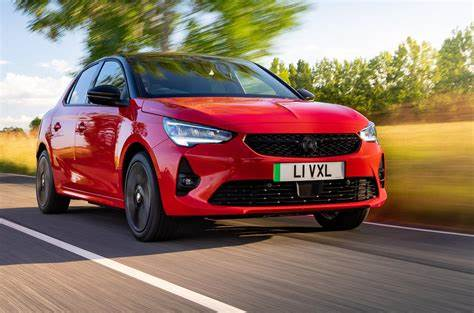

-1

In [ ]:
cv2_imshow(img)
cv.waitKey(0)

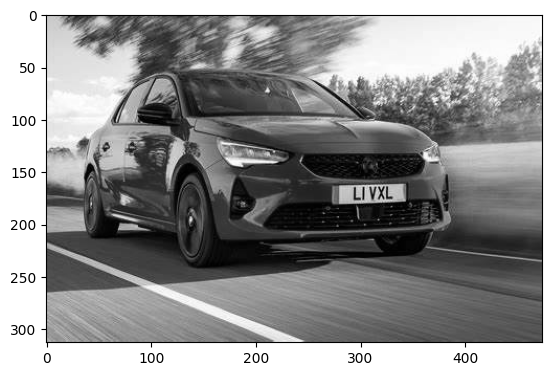

In [ ]:
grayImg = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(grayImg,cv.COLOR_BGR2RGB))

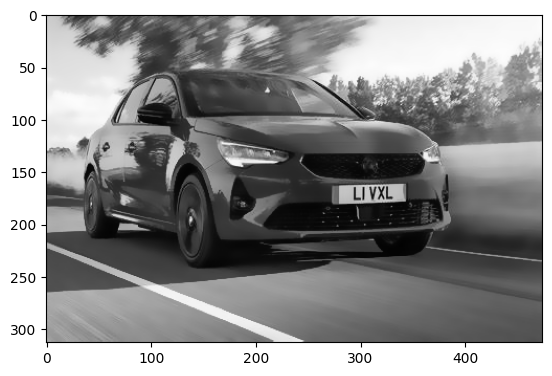

In [ ]:
filteredImg = cv.bilateralFilter(grayImg,11,17,17)
plt.imshow(cv.cvtColor(filteredImg,cv.COLOR_BGR2RGB))


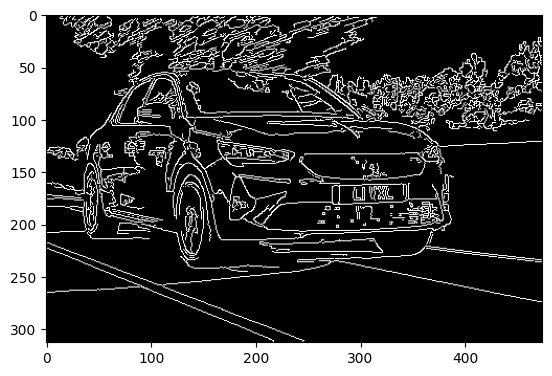

In [ ]:
edges = cv.Canny(filteredImg,30,200)
plt.imshow(cv.cvtColor(edges,cv.COLOR_BGR2RGB))


In [ ]:
rawContours = cv.findContours(edges.copy(),cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
contourss = im.grab_contours(rawContours)
rawContours[0]

(array([[[467, 236]],
 
        [[473, 236]]], dtype=int32),
 array([[[258, 233]],
 
        [[257, 234]],
 
        [[241, 234]],
 
        [[240, 235]],
 
        [[240, 236]],
 
        [[255, 236]],
 
        [[241, 236]],
 
        [[240, 235]],
 
        [[241, 234]],
 
        [[257, 234]],
 
        [[258, 233]],
 
        [[274, 233]]], dtype=int32),
 array([[[137, 232]],
 
        [[141, 232]]], dtype=int32),
 array([[[272, 229]],
 
        [[283, 229]],
 
        [[284, 230]],
 
        [[285, 229]],
 
        [[286, 229]],
 
        [[287, 230]],
 
        [[287, 229]]], dtype=int32),
 array([[[222, 224]],
 
        [[221, 225]],
 
        [[220, 225]],
 
        [[221, 225]],
 
        [[222, 224]],
 
        [[230, 224]],
 
        [[231, 225]],
 
        [[232, 224]]], dtype=int32),
 array([[[  0, 223]],
 
        [[  2, 223]],
 
        [[  3, 224]],
 
        [[  4, 224]],
 
        [[  5, 225]],
 
        [[  7, 225]],
 
        [[  8, 226]],
 
        [[  9, 226]],
 

In [ ]:
l = sorted(contourss,key=cv.contourArea,reverse=True)
contours = l[:10]
contours

[array([[[165, 119]],
 
        [[164, 120]],
 
        [[163, 120]],
 
        [[163, 122]],
 
        [[164, 123]],
 
        [[164, 129]],
 
        [[165, 130]],
 
        [[165, 131]],
 
        [[166, 132]],
 
        [[166, 133]],
 
        [[168, 135]],
 
        [[168, 136]],
 
        [[166, 138]],
 
        [[165, 138]],
 
        [[164, 139]],
 
        [[163, 139]],
 
        [[161, 141]],
 
        [[160, 141]],
 
        [[159, 142]],
 
        [[158, 142]],
 
        [[156, 144]],
 
        [[155, 144]],
 
        [[152, 147]],
 
        [[151, 147]],
 
        [[148, 144]],
 
        [[148, 143]],
 
        [[142, 137]],
 
        [[143, 136]],
 
        [[146, 136]],
 
        [[147, 135]],
 
        [[147, 132]],
 
        [[145, 132]],
 
        [[146, 132]],
 
        [[147, 133]],
 
        [[147, 134]],
 
        [[145, 136]],
 
        [[144, 136]],
 
        [[143, 135]],
 
        [[144, 134]],
 
        [[143, 135]],
 
        [[143, 136]],
 
        [[142, 1

In [ ]:
location = 0
for z in contours:
    approx = cv.approxPolyDP(z,10,True)
    # approx the contour to polygon shape it take contour , max distance between point away from contour to make the point par of polygon
    # bool to say if ploygon is closed or not
    if len(approx)==4:
        location=approx
        break
location

array([[[344, 163]],

       [[340, 179]],

       [[279, 179]],

       [[281, 163]]], dtype=int32)

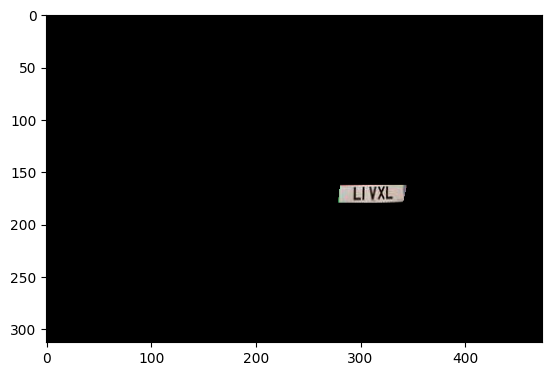

In [ ]:
mask = np.zeros(grayImg.shape, np.uint8)
new_image = cv.drawContours(mask, [location], -1,255, -1)
new_image = cv.bitwise_and(img, img, mask=mask)
plt.imshow(cv.cvtColor(new_image,cv.COLOR_BGR2RGB))


In [ ]:
(X,Y) = np.where(mask==255)
(x1,y1) = (np.min(X),np.min(Y))
(x2,y2) = (np.max(X),np.max(Y))


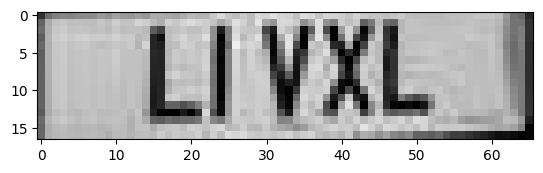

In [ ]:
croppedPart = grayImg[x1:x2+1,y1:y2+1]
plt.imshow(cv.cvtColor(croppedPart,cv.COLOR_BGR2RGB))

In [ ]:
ocr = eocr.Reader(['en'])
result = ocr.readtext(croppedPart)
result

[([[11, 0], [55, 0], [55, 17], [11, 17]], 'LI VXL', 0.8881489375830555)]

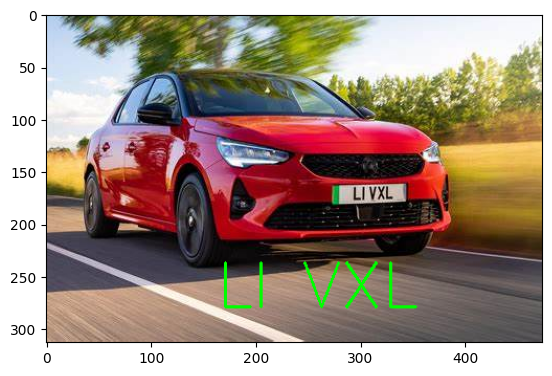

In [ ]:
cv.putText(img,result[0][-2],(x1,y1),cv.FONT_HERSHEY_SIMPLEX,2,(0,255,0),2)
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))